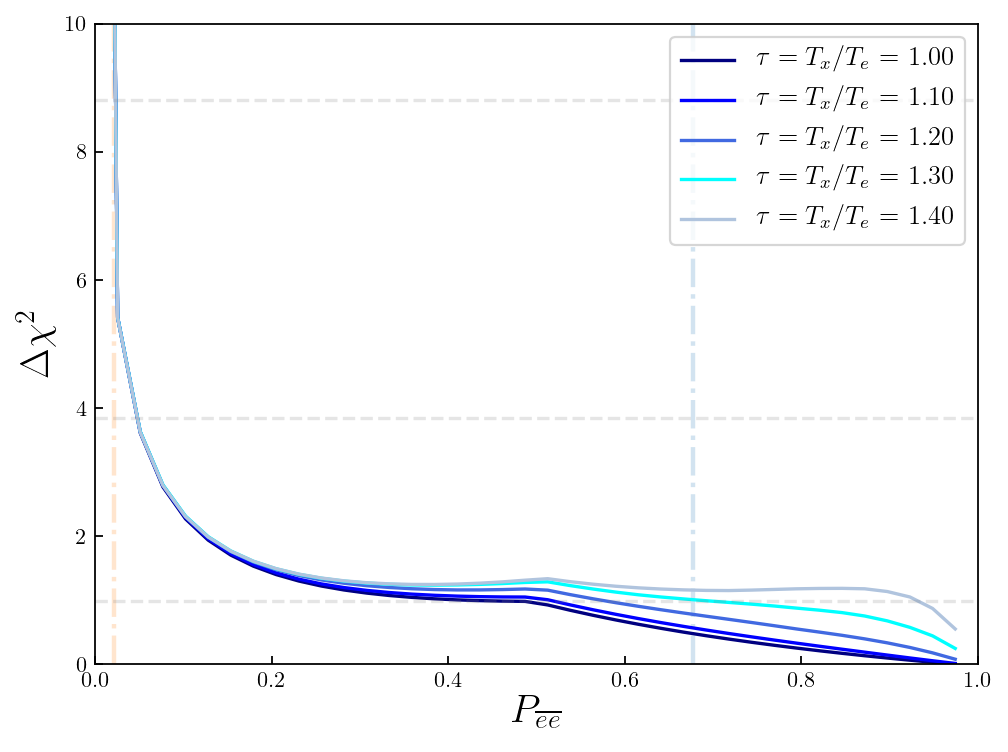

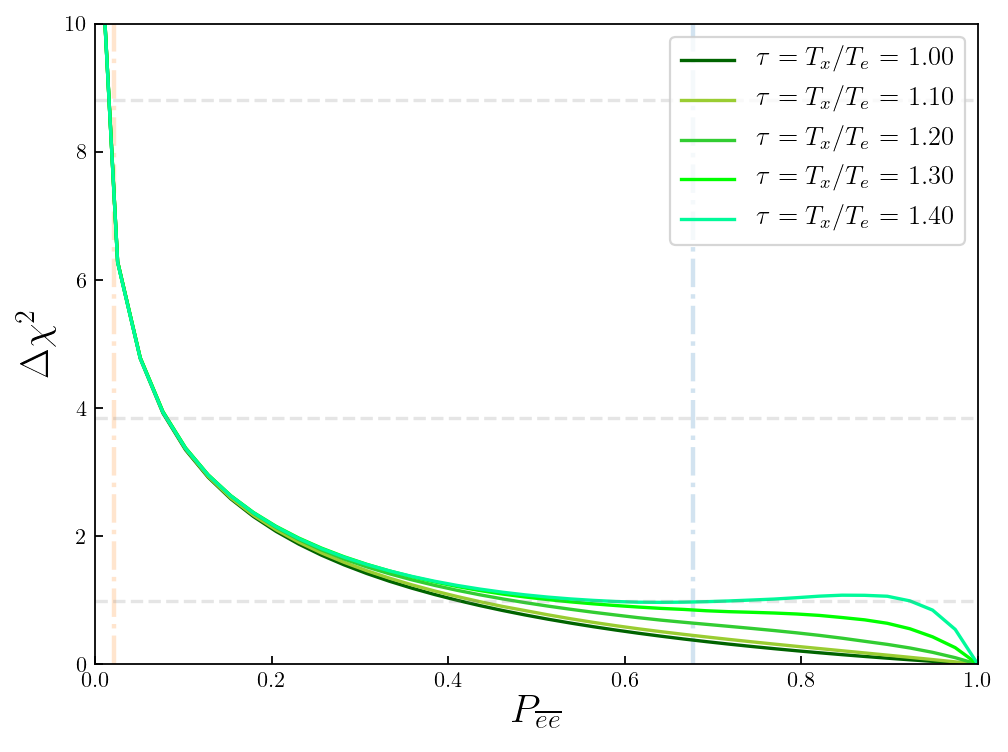

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from flavor_conversion import *
from scipy.stats import chi2   
plt.style.use('style.mplstyle')

#This data have efficiency, background
tau_vec=[1,1.1,1.2,1.3,1.4]
x_Pee_c_a=[]
L_Pee_c_a=[]
x_Pee_c_a_cont=[]
L_Pee_c_a_cont=[]

#Load
for tau in tau_vec:
    x_Pee_c_a.append(np.load("Output/Pee_c_a_tau_"+str(tau)+".npy"))
    L_Pee_c_a.append(np.load("Output/Like_Pee_c_a_tau_"+str(tau)+".npy"))
    x_Pee_c_a_cont.append(np.load("Output/Pee_c_a_cont_tau_"+str(tau)+".npy"))
    L_Pee_c_a_cont.append(np.load("Output/Like_Pee_c_a_cont_tau_"+str(tau)+".npy"))
    
L_min_c_a=10**50
L_min_c_a_cont=10**50

for i in range(len(tau_vec)):
    if L_min_c_a>np.amin(L_Pee_c_a[i]): L_min_c_a=np.amin(L_Pee_c_a[i])
    if L_min_c_a_cont>np.amin(L_Pee_c_a_cont[i]): L_min_c_a_cont=np.amin(L_Pee_c_a_cont[i])


################################################################################################
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

al = 0.2
paleta = ['navy','blue','royalblue','cyan','lightsteelblue']

plt.figure(dpi=160)

Pee_NH = Pe_surv(0,"NH")
Pee_IH = Pe_surv(0,"IH")
plt.plot(Pee_NH*np.ones(100), np.linspace(0,20,100), '-.', lw=2,alpha=al)
plt.plot(Pee_IH*np.ones(100), np.linspace(0,20,100), '-.', lw=2,alpha=al)

for i in range(len(tau_vec)):
    plt.plot(x_Pee_c_a[i],L_Pee_c_a[i]-L_min_c_a,'-', c=paleta[i], label =r"$\tau=T_{x}/ T_{e}$ = %.2f"%(tau_vec[i]))

plt.xlabel(r'$P_{\overline{ee}}$', fontsize=18)
plt.ylabel(r'$\Delta\chi^2$', fontsize=18)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.997, 1),'--', color='gray', alpha=al)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.95, 1),'--', color='gray', alpha=al)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.68, 1),'--', color='gray', alpha=al)
plt.ylim(0,10)
plt.xlim(0,1)
plt.legend(loc='upper right',fontsize=12)
plt.tick_params(direction='in')
plt.tight_layout()
plt.savefig('plots_paper/Pee_SN1987A_time_dependent_Coo_Acc.pdf',dpi=160)
plt.show()

al = 0.2
paleta = ['darkgreen','yellowgreen','limegreen','lime','mediumspringgreen']

plt.figure(dpi=160)

Pee_NH = Pe_surv(0,"NH")
Pee_IH = Pe_surv(0,"IH")
plt.plot(Pee_NH*np.ones(100), np.linspace(0,20,100), '-.', lw=2,alpha=al)
plt.plot(Pee_IH*np.ones(100), np.linspace(0,20,100), '-.', lw=2,alpha=al)

for i in range(len(tau_vec)):
    plt.plot(x_Pee_c_a_cont[i],L_Pee_c_a_cont[i]-L_min_c_a_cont,'-', c=paleta[i], label =r"$\tau=T_{x}/ T_{e}$ = %.2f"%(tau_vec[i]))

plt.xlabel(r'$P_{\overline{ee}}$', fontsize=18)
plt.ylabel(r'$\Delta\chi^2$', fontsize=18)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.997, 1),'--', color='gray', alpha=al)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.95, 1),'--', color='gray', alpha=al)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.68, 1),'--', color='gray', alpha=al)
plt.ylim(0,10)
plt.xlim(0,1)
plt.legend(loc='upper right',fontsize=12)
plt.tick_params(direction='in')
plt.tight_layout()
plt.savefig('plots_paper/Pee_SN1987A_time_dependent_Coo_Acc_Cont.pdf',dpi=160)
plt.show()